<center> <h1> <b> CS114.L21: MACHINE LEARNING <center> <h1> <b>

<center> <h2> <b> BÀI TẬP COLAB SỐ 04: SARCASM DETECTION IN NEWSPAPER HEADLINES (Ngày 07/6/2021) <center> <h> <b>

###**1. Nhóm thực hiện**

* 19522246 - Vũ Nguyễn Nhật Thanh
* 19522180 - Trương Thế Tấn
* 19521551 - Nông Thanh Hồng

##**Load data vs model**

- Do việc tạo các bộ dữ liệu, model cần rất nhiều thời gian và dung lượng lớn nên nhóm em đã lưu những file này trên drive của nhóm mà không phải GitHub vì hầu hết các file có dung lượng > 100MB.

- Nhóm em lưu lại trên drive và tải xuống thư mục colab *(code dưới)* để thầy có thể chạy thử.

- Ngoài ra, với **Word2Vec** nhóm tạo cả 2 model với **skip-gram** và **CBOW** *(Continuous Bag of Words)*. Nên dẫn đến với mỗi phương pháp của *mô hình phân loại* sẽ có 2 model ứng với **skip-gram** và **CBOW.**

- Trong đó file *data_test* và *data_train* đều là dữ liệu thô .csv gồm tiêu đề, nhãn, và link bài báo. Việc xử lý 2 file rất mất thời gian và file khi xử lý xong sẽ khá nặng *(>1GB)*. Nên nhóm cũng đã lưu lại file *train_vectors* và *test_vectors* là 2 file đã qua xử lý *(ma trận 300 cột)* để dùng train cho model. Và cũng ứng với mỗi model của Word2Vec sẽ có ***train_vectors_sg, train_vectors_cb*** và ***test_vectors_sg, test_vectors_cb***

- **Các data cần thiết**

In [ ]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 10.3MB 8.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
#data_test và data_train
!gdown --id 1BGLr1nFZJiDmIMRqSqKTUl9DXWrGd1zC   #data_test
!gdown --id 11sFNFIYm-7buRaeaTevveVTyGnh-vBFm   #data_train

#train_vector
!gdown --id 1CslWMwfPXsWs8OE4FXnzGkkH_45l7Bwg   #CBOW
!gdown --id 1H54-rQ1L0ZGvK7VIHJeGN5xC5npMH04d   #skip-gram

#test_vector
!gdown --id 1Jy5jE-IlwMybfj2GWfoGiySZa7xWwHTQ   #CBOW
!gdown --id 1rcieoJhIl-3oAIbQCr-F3Iy7qfy772XM   #skip-gram

Downloading...
From: https://drive.google.com/uc?id=1BGLr1nFZJiDmIMRqSqKTUl9DXWrGd1zC
To: /content/Sarcasm_Detection_upTest.csv
7.26MB [00:00, 61.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=11sFNFIYm-7buRaeaTevveVTyGnh-vBFm
To: /content/Sarcasm_Detection_upTrain.csv
61.1MB [00:00, 98.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CslWMwfPXsWs8OE4FXnzGkkH_45l7Bwg
To: /content/train_vectors_cb.csv
1.07GB [00:08, 129MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H54-rQ1L0ZGvK7VIHJeGN5xC5npMH04d
To: /content/train_vectors_sg.csv
1.30GB [00:32, 39.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Jy5jE-IlwMybfj2GWfoGiySZa7xWwHTQ
To: /content/test_vectors_cb.csv
148MB [00:01, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rcieoJhIl-3oAIbQCr-F3Iy7qfy772XM
To: /content/test_vectors_sg.csv
146MB [00:02, 54.8MB/s]


- **Các model Word2Vec**

In [ ]:
#Word2Vec CBOW
!gdown --id 1ZUkbi0Lba03b5GmBJg1j2o3ad19fXnqp   
!gdown --id 1-DqyCeRRrizV5GEhesayDVCj_0eNkq_N   #format binary

#Word2Vec skip-gram
!gdown --id 1-3uU1P3Cc1O7I8OTOjltaB346nVtniEg   
!gdown --id 1-5p0vGMvkD-kIDjoCL4AX2MykW6hJO-O   #format binary

Downloading...
From: https://drive.google.com/uc?id=1ZUkbi0Lba03b5GmBJg1j2o3ad19fXnqp
To: /content/word2vec_cb.model
31.2MB [00:00, 85.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DqyCeRRrizV5GEhesayDVCj_0eNkq_N
To: /content/word2vec_cb.bin
10.3MB [00:00, 38.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3uU1P3Cc1O7I8OTOjltaB346nVtniEg
To: /content/word2vec_sg.model
31.2MB [00:00, 66.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5p0vGMvkD-kIDjoCL4AX2MykW6hJO-O
To: /content/word2vec_sg.bin
10.3MB [00:00, 32.6MB/s]


- **Các model phân loại**

In [ ]:
# AdaBoost Classifier
!gdown --id 1k7na34jOxR-rlqqQieS5BKqVwiVbrWoq   #CBOW
!gdown --id 1P7_xco0cAdI3_WpsYI9XpWmm_vjrlXbf   #skip-gram

# Random Forest Classifier
!gdown --id 1-2PH6oMTreQwVurAowtHKS5JquCQ-lVH   #CBOW
!gdown --id 1-2NdoO1gyBe2NrimareffAXBDZM0xsDf   #skip-gram

# Logistic Regression
!gdown --id 1--qToQ0WZDd2tw23R1x5HYiZi8_TXgjs   #CBOW
!gdown --id 1-1q_pHadz4Nf_a0nfNRgb4LqpL3IfUuw   #skip-gram

Downloading...
From: https://drive.google.com/uc?id=1k7na34jOxR-rlqqQieS5BKqVwiVbrWoq
To: /content/AdaBoostClassifier_model_cb.sav
100% 533k/533k [00:00<00:00, 34.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P7_xco0cAdI3_WpsYI9XpWmm_vjrlXbf
To: /content/AdaBoostClassifier_model_sg.sav
100% 533k/533k [00:00<00:00, 75.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-2PH6oMTreQwVurAowtHKS5JquCQ-lVH
To: /content/RandomForestClassifier_model_cb.sav
186MB [00:01, 98.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-2NdoO1gyBe2NrimareffAXBDZM0xsDf
To: /content/RandomForestClassifier_model_sg.sav
211MB [00:01, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--qToQ0WZDd2tw23R1x5HYiZi8_TXgjs
To: /content/LogisticRegressionClassifier_model_cb.sav
100% 3.31k/3.31k [00:00<00:00, 5.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1q_pHadz4Nf_a0nfNRgb4LqpL3IfUuw
To: /content/LogisticRegressionClassifier_model_sg.sav
100% 3.31k/3.31k [00

- **Load tất cả thư viện cần thiết**

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec

from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

import os
import nltk
import gensim

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import svm

import pickle
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

INFO - 14:10:48: 'pattern' package not found; tag filters are not available for English
INFO - 14:10:48: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 14:10:48: built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


#**Tham khảo**
1. [Word Embeddings Transformers In SVM Classifier Using Python](https://www.nbshare.io/notebook/197284676/Word-Embeddings-Transformers-In-SVM-Classifier-Using-Python/)

2. [Text classification using word2vec](https://www.kaggle.com/ananyabioinfo/text-classification-using-word2vec)

3. [Gensim Word2Vec Tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)

4. [Save and Load Machine Learning Models in Python with scikit-learn](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)

5. [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)

6. [What Are Word Embeddings for Text?](https://machinelearningmastery.com/what-are-word-embeddings/)

7. [Các phương pháp đánh giá một hệ thống phân lớp](https://machinelearningcoban.com/2017/08/31/evaluation/)

#**I. Đọc và kiểm tra dữ liệu**

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

Lấy link url file *Sarcasm_Detection_Train.csv* 

In [ ]:
url_df_train = "/content/Sarcasm_Detection_upTrain.csv"

#url_df_train = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/dataset/Sarcasm_Detection_upTrain.csv"

Trong file csv (cả data_train và data_test) gồm 3 cột là: **is_sarcastic, title, article_link**. 
  - *is_sarcastic*: là label ứng với tiêu đề của bài báo châm biếm hay chính thống. 
    - **0**: Chính thống
    - **1**: Châm biếm
  - *title*: tiêu đề bài báo
  - *article_link*: link dẫn tới bài báo trên các trang báo

Với file df_train *(Sarcasm_Detection_Train.csv)* gồm 337758 dòng.

In [ ]:
df_train = pd.read_csv(url_df_train)

print (df_train.shape)
df_train.head()

(381538, 3)


,is_sarcastic,title,article_link
0,0,Is a Syria Truce In Putin's Best Interest?,https://www.newsweek.com/syria-truce-putins-be...
1,1,"‘It’s just you and me again, Bunty’ Theresa Ma...",https://newsthump.com/2018/07/11/its-just-you-...
2,0,Brad Parscale Fell From Trump’s Favor. Now He’...,https://www.nytimes.com/2020/12/24/us/politics...
3,1,Here’s What Vaccine You Are Based on Your Zodi...,https://thebeaverton.com/2021/05/heres-what-va...
4,0,David Miliband of the International Rescue Com...,https://www.nytimes.com/2019/04/18/business/da...


Với việc phân loại tin châm biếm và tin chính thống, chỉ cần giữ lại 2 cột là **is_sarcastic** *(label)* và **title** *(tiêu đề)* để thực hiện xử lý vào xây dựng model.

In [ ]:
df_train = df_train[['is_sarcastic', 'title']]

print (df_train.shape)

(381538, 2)


In [ ]:
df_train.head()

,is_sarcastic,title
0,0,Is a Syria Truce In Putin's Best Interest?
1,1,"‘It’s just you and me again, Bunty’ Theresa Ma..."
2,0,Brad Parscale Fell From Trump’s Favor. Now He’...
3,1,Here’s What Vaccine You Are Based on Your Zodi...
4,0,David Miliband of the International Rescue Com...


Kiểm tra và biểu diễn dữ liệu từ *df_train* và *df_test*

0    229813
1    151725
Name: is_sarcastic, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


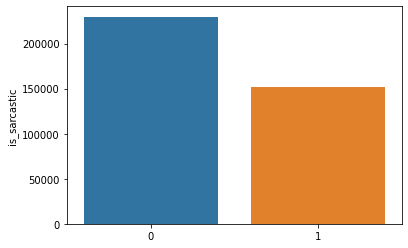

In [ ]:
x = df_train['is_sarcastic'].value_counts()
print(x)
sns.barplot(x.index,x)

Một nhận xét dễ dàng nhận ra là có sự chênh lệch dữ liệu lớn giữa nhãn ***0*** và ***1*** *(dù các trang tin châm biếm được crawl bài từ những năm thành lập)*, cụ thể:
  - *df_train*: *label 0* gấp **1.5** lần *label 1* (229813/107945 = 1.514).

Điều đó có thể lý giải bởi những trang tin châm biến có tần suất ra bài ít hơn những trang báo chính thống có sự hỗ trợ từ các tổ chức, cơ quan và có nhiều nhà báo hơn.

Kiểm trả xem trong tập dữ liệu *df_train* có giá trị rỗng không. Nếu có thì xóa những hàng đó.

In [ ]:
print ("df_train:\n",df_train.isnull().sum())

df_train = df_train.dropna().reset_index(drop=True)

INFO - 06:53:53: NumExpr defaulting to 2 threads.


df_train:
 is_sarcastic    0
title           1
dtype: int64


#**II. Tạo Word Embedding**

In [ ]:
from gensim.models.phrases import Phrases, Phraser


INFO - 13:58:01: 'pattern' package not found; tag filters are not available for English


##**1. Clean Text**

Bổ sung và loại bỏ các từ dừng *(stopwords)* và các ký tự không phải chữ cái cho mỗi dòng tiêu đề.

In [ ]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

Xóa các ký tự không phải chữ 

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_train['title'])

In [ ]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 6.98 mins


Đặt các kết quả vào DataFrame để loại bỏ các giá trị bị thiếu và trùng lặp

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()

print (df_clean.shape)
df_clean.head()

(230109, 1)


,clean
0,syria truce putin good interest
1,s bunty theresa tell beloved childhood teddy...
2,brad parscale fall trump s favor s plot comeback
3,s vaccine base zodiac sign
4,david miliband international rescue committee ...


##**2. Bigrams**

Sử dụng gói Gensim Phrase để tự động phát hiện các cụm từ phổ biến *(bigram)* từ danh sách các tiêu đề.

In [ ]:
sent = [row.split() for row in df_clean['clean']]

#Tạo các cụm từ có liên quan từ danh sách tiêu đề
phrases = Phrases(sent, min_count=30, progress_per=10000)


INFO - 13:59:18: collecting all words and their counts
INFO - 13:59:18: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 13:59:18: PROGRESS: at sentence #10000, processed 69592 words and 64826 word types
INFO - 13:59:19: PROGRESS: at sentence #20000, processed 139359 words and 117078 word types
INFO - 13:59:19: PROGRESS: at sentence #30000, processed 208721 words and 164758 word types
INFO - 13:59:19: PROGRESS: at sentence #40000, processed 278339 words and 209857 word types
INFO - 13:59:19: PROGRESS: at sentence #50000, processed 347775 words and 252970 word types
INFO - 13:59:19: PROGRESS: at sentence #60000, processed 416928 words and 294492 word types
INFO - 13:59:19: PROGRESS: at sentence #70000, processed 486451 words and 335281 word types
INFO - 13:59:19: PROGRESS: at sentence #80000, processed 555741 words and 374563 word types
INFO - 13:59:20: PROGRESS: at sentence #90000, processed 624957 words and 412640 word types
INFO - 13:59:20: PROGRESS: at sentence #1

Mục tiêu của *Phraser ()* là giảm mức tiêu thụ bộ nhớ của *Phrases ()* *(Phrases() $\neq$ Phraser())*, bằng cách loại bỏ trạng thái mô hình không hoàn toàn cần thiết cho nhiệm vụ phát hiện bigram:

In [ ]:
bigram = Phraser(phrases)

#Chuyển đổi kho dữ liệu dựa trên bigram được phát hiện
sentences = bigram[sent]

INFO - 13:59:25: source_vocab length 885206
INFO - 13:59:35: Phraser built with 794 phrasegrams


##**3. Most Frequent Words**

Chủ yếu là kiểm tra tính hiệu quả của [lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python), loại bỏ các từ khóa và bổ sung bigram

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

53380

In [ ]:
print (sorted(word_freq, key=word_freq.get, reverse=True)[:10])

['s', "'", 'trump', 'new', 'say', 'u_s', 'man', 'die', 'year', 'review']


#**III. Training the model Word2Vec**

In [ ]:
import multiprocessing
from gensim.models import Word2Vec

from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

INFO - 14:02:39: adding document #0 to Dictionary(0 unique tokens: [])
INFO - 14:02:39: built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


Phương pháp Word2Vec có 2 mô hình khác nhau được sử dụng để nhúng từ:

1. Continuous Bag-of-Words, or **CBOW** model.
2. Continuous **Skip-Gram** Model.

CBOW model học cách nhúng bằng cách dự đoán từ hiện tại dựa trên ngữ cảnh của nó. Ngược lại, Skip-Gram model học bằng cách dự đoán các từ xung quanh cho một từ hiện tại.

![word2vec](https://machinelearningmastery.com/wp-content/uploads/2017/08/Word2Vec-Training-Models-1024x624.png)

##**1. Gensim Word2Vec**

Thiết lập các tham số của mô hình Word2Vec

In [ ]:
# Count the number of cores in a computer
cores = multiprocessing.cpu_count() 

print (cores)

2


**Những tham số:**

- ***min_count* = int** - Bỏ qua tất cả các từ có tổng tần suất tuyệt đối thấp hơn tần suất này
- ***window* = int** - Khoảng cách tối đa giữa từ hiện tại và từ dự đoán trong một câu. Ví dụ. từ *window* ở bên trái và từ *window* ở bên trái mục tiêu.
- ***size* = int** - Kích thước của các vectơ đối tượng. - (50, 300)
- ***sample* = float** - Ngưỡng để định cấu hình các từ có tần suất cao hơn được lấy mẫu giảm xuống một cách ngẫu nhiên. Phạm vi hữu ích - (0, 1e-5)
- ***alpha* = float** - Tỷ lệ học ban đầu - (0,01, 0,05)
- ***min_alpha* = float** - Tốc độ học tập sẽ giảm tuyến tính xuống *min_alpha* khi quá trình đào tạo diễn ra. Để đặt nó: alpha - (min_alpha * epochs) ~ 0,00
- ***negative* = int** - Nếu > 0, lấy mẫu phủ định sẽ được sử dụng, int cho âm xác định có bao nhiêu "từ nhiễu" nên được rút ra. Nếu được đặt thành 0, không có lấy mẫu âm tính nào được sử dụng. - (5, 20)
- ***worker* = int** - Sử dụng nhiều luồng worker này để đào tạo mô hình (= đào tạo nhanh hơn với máy nhiều lõi)
- **sg**: nếu *sg=1* thì word2vec sử dụng Skip-gram model, ngược lại là CBOW.




Word2Vec mặc định sẽ sử dụng CBOW *(sg=0)*, để sử dụng skip-gram, thêm tham số **sg=1** vào *gensim.models.Word2Vec(..., sg=1)*

Nhóm em tạo lần lượt 2 model Word2Vec CBOW và Word2Vec skip-gram. So sánh với nhau và dùng từng model để thực hiện xây dựng model phân loại và dự đoán kết quả.

In [ ]:
#word2vec skip-gram
w2v_model_sg = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1,
                      sg=1) #chạy skip-gram

In [ ]:
#word2vec CBOW
w2v_model_cb = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

##**2. Vocabulary Table**

Xây dựng từ vựng từ các tiêu đề và khởi tạo mô hình. Word2Vec yêu cầu xây dựng bảng từ vựng, tìm hiểu tất cả các từ và lọc ra các từ duy nhất và thực hiện một số phép đếm cơ bản trên các từ

In [ ]:
t = time()

w2v_model_sg.build_vocab(sentences, progress_per=10000)

w2v_model_cb.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

##**3. Training of the model**

Các thông số của khóa đào tạo: 
 - *total_examples* = int - Số lượng tiêu đề 
 - *epochs* = int - Số lần lặp lại (epochs) trên corpus - [10, 20, 30]

In [ ]:
t = time()

w2v_model_sg.train(sentences, total_examples=w2v_model_sg.corpus_count, epochs=30, report_delay=1)

w2v_model_cb.train(sentences, total_examples=w2v_model_cb.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

##**4. Save and Load model Word2Vec**

Do ở Colab *(free)* sau 12 tiếng sẽ reset một lần nên để tiếm kiệm thời gian và công sức cho những lần sau ta sẽ lưu lại model Word2Vec *(w2v_model)*.

Tận dụng lưu model lại trên Drive hoặc lưu lại model trên thư mục colab hiện tại để tải về máy và upload lên github

In [ ]:
#Lưu w2v_model_cb vào drive
w2v_model_cb.save("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_cb.model")

#Lưu w2v_model_sg vào drive
w2v_model_sg.save("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_sg.model")

INFO - 03:00:59: saving Word2Vec object under word2vec_cb.model, separately None
INFO - 03:00:59: not storing attribute vectors_norm
INFO - 03:00:59: not storing attribute cum_table
INFO - 03:00:59: saved word2vec_cb.model
INFO - 03:01:00: saving Word2Vec object under /content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_cb.model, separately None
INFO - 03:01:00: not storing attribute vectors_norm
INFO - 03:01:00: not storing attribute cum_table
INFO - 03:01:00: saved /content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_cb.model


In [ ]:
#lưu w2v_model với format là binary vào thư mục hiện tại
w2v_model_sg.wv.save_word2vec_format("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_cb.bin", binary=True)
w2v_model_cb.wv.save_word2vec_format("/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_sg.bin", binary=True)

INFO - 03:01:12: storing 8493x300 projection weights into /content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_cb.bin
INFO - 03:01:12: storing 8493x300 projection weights into /content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/word2vec_sg.bin


- **Load model từ Drive hoặc từ GitHub:**

In [ ]:
#Load w2v_model từ drive
w2v_model_sg = Word2Vec.load("/content/word2vec_sg.model")
w2v_model_cb = Word2Vec.load("/content/word2vec_cb.model")

INFO - 14:02:45: loading Word2Vec object from /content/word2vec_sg.model
INFO - 14:02:46: loading wv recursively from /content/word2vec_sg.model.wv.* with mmap=None
INFO - 14:02:46: setting ignored attribute vectors_norm to None
INFO - 14:02:46: loading vocabulary recursively from /content/word2vec_sg.model.vocabulary.* with mmap=None
INFO - 14:02:46: loading trainables recursively from /content/word2vec_sg.model.trainables.* with mmap=None
INFO - 14:02:46: setting ignored attribute cum_table to None
INFO - 14:02:46: loaded /content/word2vec_sg.model
INFO - 14:02:46: loading Word2Vec object from /content/word2vec_cb.model
INFO - 14:02:46: loading wv recursively from /content/word2vec_cb.model.wv.* with mmap=None
INFO - 14:02:46: setting ignored attribute vectors_norm to None
INFO - 14:02:46: loading vocabulary recursively from /content/word2vec_cb.model.vocabulary.* with mmap=None
INFO - 14:02:46: loading trainables recursively from /content/word2vec_cb.model.trainables.* with mmap=Non

##**5. Example model**

- **Từ gần giống và không giống:**

In [ ]:
#Từ gần với "coronavirus"
# Sử dụng cả 2 model để so sánh
w2v_model_sg.wv.most_similar('coronavirus'), w2v_model_cb.wv.most_similar('coronavirus')

INFO - 14:02:55: precomputing L2-norms of word weight vectors
INFO - 14:02:55: precomputing L2-norms of word weight vectors


([('virus', 0.6938843131065369),
  ('covid', 0.6718800067901611),
  ('pandemic', 0.5410641431808472),
  ('coronavirus_outbreak', 0.4747026264667511),
  ('lockdown', 0.4653673768043518),
  ('epicenter', 0.4579155445098877),
  ('virus_spread', 0.439346045255661),
  ('variant', 0.43419966101646423),
  ('infection', 0.4339911639690399),
  ('vaccine_rollout', 0.42973995208740234)],
 [('virus', 0.7579675912857056),
  ('covid', 0.7446305751800537),
  ('coronavirus_outbreak', 0.5814684629440308),
  ('pandemic', 0.5682507753372192),
  ('second_wave', 0.5469757318496704),
  ('virus_spread', 0.5118873119354248),
  ('zika_virus', 0.5013904571533203),
  ('infection', 0.49922600388526917),
  ('measle', 0.4949232041835785),
  ('h_v', 0.49320948123931885)])

In [ ]:
#Từ gần giống "brexit"
w2v_model_sg.wv.most_similar("brexit"), w2v_model_cb.wv.most_similar("brexit")

([('eu', 0.5479477643966675),
  ('johnson', 0.5078952312469482),
  ('brexit_deal', 0.4950704574584961),
  ('tory', 0.48097628355026245),
  ('theresa', 0.472481906414032),
  ('moan', 0.46687737107276917),
  ('deal_brexit', 0.4663698375225067),
  ('remainer', 0.4593125879764557),
  ('boris_johnson', 0.44393450021743774),
  ('brexiteer', 0.43751198053359985)],
 [('brexit_deal', 0.6190416812896729),
  ('eu', 0.569905161857605),
  ('deal_brexit', 0.5612530708312988),
  ('remainer', 0.5347695350646973),
  ('post_brexit', 0.501359760761261),
  ('backstop', 0.5008552074432373),
  ('dup', 0.4953097105026245),
  ('theresa', 0.4918477237224579),
  ('general_election', 0.48636025190353394),
  ('corbyn', 0.48126959800720215)])

10 từ gần giống và không gần với "trump"

In [ ]:
#model Word2Vec skip-gram

print ("10 Most dissimilar:\n", [i[0] for i in w2v_model_sg.wv.most_similar(negative=["trump"])])
             
print ("10 Most similar:\n", [i[0] for i in w2v_model_sg.wv.most_similar('trump')])

10 Most dissimilar:
 ['hop', 'explorer', 'extinction', 'wander', 'mug', 'function', 'cabin', 'fictional', 'glue', 'spice']
10 Most similar:
 ['donald_trump', 'president', 'biden', 'democrats', 'obama', 'white_house', 'republicans', 'michael_dorf', "'", 'arpaio']


In [ ]:
#model Word2Vec CBOW

print ("10 Most dissimilar:\n", [i[0] for i in w2v_model_cb.wv.most_similar(negative=["trump"])])
             
print ("10 Most similar:\n", [i[0] for i in w2v_model_cb.wv.most_similar('trump')])

10 Most dissimilar:
 ['hop', 'scent', 'crawl', 'blend', 'stylish', 'sharon', 'pastry', 'explorer', 'gum', 'letter_recommendation']
10 Most similar:
 ['donald_trump', 'obama', 'biden', 'tillerson', 'rudy_giuliani', 'john_bolton', 'michael_dorf', 'president', 'pompeo', 'white_house']


#**IV. Text Classification**

##**1. Xử lý dữ liệu**

In [ ]:
# model word2vec skip-gram
embeddings = KeyedVectors.load_word2vec_format("/content/word2vec_sg.bin", binary=True)

INFO - 14:04:33: loading projection weights from /content/word2vec_sg.bin
INFO - 14:04:33: loaded (8493, 300) matrix from /content/word2vec_sg.bin


In [ ]:
# model word2vec CBOW
embeddings = KeyedVectors.load_word2vec_format("/content/word2vec_cb.bin", binary=True)

INFO - 14:04:41: loading projection weights from /content/word2vec_cb.bin
INFO - 14:04:41: loaded (8493, 300) matrix from /content/word2vec_cb.bin


In [ ]:
def process_title(df):
  # tải các từ stopwords
  nltk.download('stopwords')
  docs_vectors = pd.DataFrame()

  # loại bỏ những stop words tiếng anh
  stopwords = nltk.corpus.stopwords.words('english') 
  for doc in df['title'].str.lower().str.replace('[^a-z ]', ''): # duyệt qua từng tiêu đề và xử lý làm sạch
      
      # tạo khung dữ liệu tạm thời (lưu trữ giá trị cho tài liệu thứ nhất & cho tài liệu thứ hai, xóa các chi tiết của tài liệu thứ nhất và quy trình đến thứ hai, v.v.)
      temp = pd.DataFrame() 

      #lặp lại từng từ của một tiêu đề và tách qua khoảng trắng
      for word in doc.split(' '): 
          if word not in stopwords: # nếu từ không có trong từ dừng thì (try)
              try:
                  word_vec = embeddings[word] # nếu từ có trong nhúng thì hãy tiếp tục
                  temp = temp.append(pd.Series(word_vec), ignore_index = True) # nếu có từ thì nối nó vào khung dữ liệu tạm thời
              except:
                  pass

      doc_vector = temp.mean()
      docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # nối mỗi giá trị tiêu đề vào khung dữ liệu cuối cùng
  
  #Bổ dung nhãn vào khung dữ liệu cuối cùng và xóa các giá rỗng
  docs_vectors['is_sarcastic'] = df['is_sarcastic']
  docs_vectors = docs_vectors.dropna()
      
  return docs_vectors


- Xử lý file data_train *(df_train)*

In [ ]:
train_vectors = process_title(df_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- Như trình bày ở phần đầu, do việc xử lý file *data_train* mất thời gian và dung lượng lớn nên nhóm đã lưu file lại khi thực hiện xong.

**Save vs Read train_vectors**

- **Save train_vectors**

In [ ]:
#train_vector với word2vec skip-gram
url_drive = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/train_vectors_sg.csv"
train_vectors.to_csv(url_drive, header=True, index=False)

In [ ]:
#train_vector với word2vec CBOW
url_drive = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/train_vectors_cb.csv"
train_vectors.to_csv(url_drive, header=True, index=False)

- **Read train_vectors**

In [ ]:
#xử lý bởi model Word2Vec CBOW
train_vectors_cb = pd.read_csv("/content/train_vectors_cb.csv")

print (train_vectors_cb.shape)
train_vectors_cb.head()

(306149, 301)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,is_sarcastic
0,-0.535678,0.344523,-0.262401,0.138592,-0.162678,-0.148587,-0.263709,0.118172,0.165810,0.289190,-0.054791,-0.322778,-0.046923,0.015730,0.003154,0.102439,-0.045788,0.012687,-0.195183,0.142032,-0.101116,-0.250822,0.087148,-0.185045,-0.285375,0.115035,0.169410,0.003926,0.179750,0.600111,-0.197195,-0.041441,-0.255220,0.223379,0.195088,-0.170427,0.018393,-0.126754,-0.260834,-0.470049,...,-0.220016,-0.032893,0.081764,0.037006,0.083880,-0.065347,0.105249,0.223267,-0.121771,0.185504,0.021374,-0.144321,-0.113284,-0.077772,0.153538,0.064202,0.243200,0.087767,0.003224,0.062448,0.170716,-0.007571,-0.185785,0.157862,0.041893,0.179644,0.097095,0.008313,-0.063617,0.182064,0.157484,-0.287224,0.481465,-0.183895,-0.083145,0.079648,0.004276,0.084812,-0.110865,0
1,-0.233379,0.193487,-0.009435,-0.154770,-0.189387,-0.055402,0.029189,0.357769,-0.041126,-0.117721,0.066785,0.053213,0.122101,0.010109,0.098130,0.082924,0.223062,0.060519,0.081008,0.112854,-0.128700,-0.232251,0.170100,-0.038075,-0.153749,0.042335,0.071745,0.031920,-0.131974,0.132487,0.020931,0.055034,-0.261671,-0.088927,0.209420,0.022832,0.012327,-0.106623,-0.126934,-0.076834,...,0.078732,0.022177,0.108586,0.033127,0.026822,-0.130349,0.079785,0.059742,-0.238595,0.231147,0.088211,-0.287097,-0.101468,0.100053,0.041244,0.253918,0.031508,0.069474,-0.159352,-0.154591,-0.024009,0.213248,0.104125,0.209303,-0.075392,0.190068,0.163472,0.019199,0.197993,-0.016651,0.140138,0.041606,0.139989,-0.043529,-0.037679,-0.039398,-0.022093,0.322774,-0.035297,1
2,-0.235082,-0.169484,0.064375,0.445260,-0.533067,-0.033547,-0.253011,0.102846,0.080528,-0.036279,0.130170,-0.064122,0.091823,-0.109135,-0.168479,0.433787,-0.017849,0.251277,-0.345739,-0.042340,0.146967,-0.063283,-0.020892,0.289060,-0.275218,-0.170140,0.248943,-0.203116,0.367872,0.324900,-0.130321,0.172778,0.076295,0.274419,0.095467,-0.035341,0.305199,0.219562,-0.196638,0.160964,...,0.008477,-0.054566,0.019778,-0.098426,0.072189,0.007837,-0.169601,-0.166860,-0.237213,-0.113566,-0.036208,-0.364632,-0.213467,-0.116903,0.495801,0.479967,0.045662,-0.211952,0.301491,-0.038895,0.594772,0.241369,-0.109144,0.337974,0.257221,0.035002,0.013557,-0.346130,-0.150385,-0.196474,0.283668,-0.235420,0.100244,0.184146,-0.083518,0.078835,0.286957,0.248334,0.073380,0
3,-0.121005,-0.027502,-0.368056,0.196006,-0.075984,0.076198,0.188696,0.191259,-0.004566,0.047173,-0.011302,-0.117373,-0.214447,0.035656,-0.057080,0.121140,-0.010763,0.179588,-0.126804,-0.045646,0.108602,0.038041,0.461506,-0.042444,-0.196380,-0.126284,0.076813,0.063012,0.454412,0.185148,0.039693,-0.215786,-0.158428,0.309451,0.406135,0.121337,0.082249,-0.059496,-0.147269,-0.378651,...,-0.094510,-0.107362,-0.023400,-0.049541,0.121019,-0.122580,0.037163,0.122952,-0.198081,0.050516,0.002055,0.228673,-0.010662,0.081673,0.382961,0.139871,0.101474,-0.148938,0.168512,0.048918,0.002493,-0.124789,-0.158104,0.313557,0.041322,0.107699,0.069404,0.058646,0.260766,0.197317,0.129825,-0.288211,0.206060,-0.285010,-0.115153,0.104247,0.039086,-0.353257,0.086667,1
4,0.079524,-0.244897,0.043569,0.174805,-0.118556,0.224020,-0.173496,0.196636,0.042692,0.014062,0.088707,-0.091129,0.153851,0.067017,0.082250,0.047656,0.098063,-0.003330,-0.179937,0.039139,-0.075080,-0.266259,0.051281,-0.119917,-0.132247,-0.024405,0.157927,0.063417,0.258689,0.464244,-0.142828,-0.065529,-0.069076,0.291207,0.236737,-0.018927,-0.077986,0.148859,-0.177961,-0.037538,...,-0.169929,0.017364,0.043517,0.138313,0.156190,0.051386,0.245449,-0.138271,-0.344458,0.105763,0.122491,-0.258468,-0.181772,0.107737,0.038337,-0.060688,0.188834,-0.087608,0.042902,0.203910,0.355430,0.133039,-0.121425,-0.012224,0.279903,-0.180012,0.267628,-0.050613,0.095614,0.011147,-0.019816,0.016691,-0.014433,0.194742

In [ ]:
#xử lý bởi model Word2Vec skip-gram
train_vectors_sg = pd.read_csv("/content/train_vectors_sg.csv")

print (train_vectors_sg.shape)
train_vectors_sg.head()

(375977, 301)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,is_sarcastic
0,-0.518816,0.296910,-0.337493,0.215343,-0.189444,-0.183413,0.068378,0.084411,0.263366,0.477756,-0.217265,-0.261960,0.158024,0.067116,0.297130,-0.035234,-0.484552,0.081206,-0.051089,0.260732,-0.358355,-0.121655,0.161040,-0.217798,-0.302960,0.003004,-0.038444,-0.124521,-0.558252,0.488653,-0.348078,0.072205,-0.037748,0.361384,0.144424,0.061370,-0.055429,-0.104901,-0.026055,-0.353621,...,-0.335324,0.022858,0.085148,-0.029313,-0.018876,-0.125595,0.067295,-0.206926,-0.045714,-0.142171,0.143412,0.304967,0.035395,-0.065534,0.103595,0.147395,0.276284,0.058824,0.035470,-0.097851,0.132376,-0.062272,-0.215749,0.092397,0.157527,-0.093637,0.113551,-0.017560,-0.135328,0.426124,-0.013229,-0.233247,0.227038,-0.178131,-0.001486,0.059871,0.266176,0.334979,0.085550,0
1,-0.063235,0.256896,-0.140151,-0.072815,-0.284079,-0.101310,0.443268,0.258144,-0.068438,-0.048265,-0.128233,0.234744,-0.001167,0.146258,0.186952,0.187579,0.129798,0.203317,0.221918,0.296197,-0.058361,-0.277396,0.486237,0.083740,-0.111387,0.059513,0.057950,0.001598,-0.334262,0.036347,-0.027187,0.119761,-0.082139,-0.105331,0.303198,0.091529,0.080389,-0.222999,0.134159,-0.159204,...,-0.037897,0.177115,-0.106470,0.037914,0.076026,-0.048547,0.041424,-0.078272,-0.264480,0.095303,0.082000,-0.092318,-0.100708,0.012485,-0.046059,0.388430,0.054606,0.035248,-0.093436,-0.168163,0.038302,0.090022,0.094632,-0.165415,-0.136180,0.409412,0.184204,0.239344,0.060184,-0.137211,0.096055,0.047371,-0.039225,-0.006939,-0.138123,-0.109716,0.076390,0.338048,0.091842,1
2,-0.057057,-0.335855,-0.027191,0.528094,-0.555472,-0.143953,0.078065,0.046699,-0.060982,-0.048627,0.107946,0.076006,0.030438,-0.359398,-0.231791,0.408929,0.066941,0.393173,-0.434638,-0.104606,0.056017,-0.143294,0.311880,0.184190,-0.434742,-0.229263,0.093035,-0.042586,0.187964,0.575026,-0.068265,0.084856,0.185955,0.299080,-0.284678,0.148818,0.516228,0.074676,0.005909,0.083673,...,0.014247,-0.107251,0.026772,-0.110058,-0.315305,0.034213,-0.024955,-0.428599,-0.123676,-0.146067,-0.060413,-0.409100,-0.173823,0.045177,0.642673,0.613394,-0.100198,0.007523,0.346730,-0.114213,0.334538,-0.081506,-0.340418,0.220123,0.433689,0.142707,0.231170,-0.322989,-0.228132,-0.175683,0.257809,-0.141085,-0.052594,0.160925,0.003957,0.101145,0.160365,0.259874,0.160518,0
3,-0.058442,0.190886,-0.317128,0.344995,0.039545,-0.039438,0.590257,0.193363,-0.116360,0.701816,-0.433960,-0.152942,-0.611122,-0.017407,0.015506,0.202223,0.055701,0.115552,-0.131477,0.048160,-0.138484,0.067177,0.506001,0.216013,-0.449543,0.201590,-0.031811,-0.016248,0.197076,0.307029,-0.066298,-0.106734,-0.350221,0.559930,0.539200,0.117284,0.008109,-0.458355,-0.217730,-0.604912,...,-0.009767,0.545574,-0.246560,-0.149918,0.327241,-0.228579,0.350878,-0.028387,-0.207385,-0.177757,0.068347,0.150184,0.032569,0.115410,0.503961,0.134977,0.043730,-0.415665,0.323797,0.177802,-0.433542,-0.056991,-0.131498,0.476352,-0.234705,0.530037,0.292551,-0.007511,0.126303,0.793671,-0.102514,-0.578881,0.149904,-0.195118,-0.081794,0.315515,0.256775,-0.648429,0.064794,1
4,-0.059866,-0.241970,0.031918,0.364825,-0.111859,-0.063702,-0.049639,0.145677,0.101281,0.003260,0.011423,-0.018009,0.392530,0.039555,0.170430,0.080268,0.235145,0.133791,-0.407745,0.130994,-0.184457,-0.295931,0.096918,0.127727,0.060448,-0.205717,0.195222,-0.138867,0.095992,0.477834,-0.221867,-0.151934,0.100188,0.261662,0.036504,0.203546,-0.021457,0.164396,-0.253866,-0.093778,...,-0.030074,0.222389,0.047038,0.181899,0.006457,0.126336,0.205389,-0.005220,-0.408021,-0.007573,0.158433,-0.270457,-0.010258,0.271528,-0.229287,-0.066272,0.259431,-0.093026,-0.136019,0.231116,0.095450,0.178035,0.010714,-0.202972,0.307552,-0.053201,0.279564,-0.116704,0.050600,0.052677,-0.152288,0.041934,-0.01037

**Chia dữ liệu train thành 2 phần là train và test**

- *CBOW*

In [ ]:
#split train data
train_x_cb, test_x_cb, train_y_cb, test_y_cb = train_test_split(train_vectors_cb.drop('is_sarcastic', axis = 1),
                                                   train_vectors_cb['is_sarcastic'],
                                                   test_size = 0.2,
                                                   random_state = 1)

train_x_cb.shape, train_y_cb.shape, test_x_cb.shape, test_y_cb.shape

((244919, 300), (244919,), (61230, 300), (61230,))

- *skip-gram*

In [ ]:
#split train data
train_x_sg, test_x_sg, train_y_sg, test_y_sg = train_test_split(train_vectors_sg.drop('is_sarcastic', axis = 1),
                                                   train_vectors_sg['is_sarcastic'],
                                                   test_size = 0.2,
                                                   random_state = 1)

train_x_sg.shape, train_y_sg.shape, test_x_sg.shape, test_y_sg.shape

((300781, 300), (300781,), (75196, 300), (75196,))

*Biểu diễn dữ liệu train và test*

##**2. Training model classification**

**Load các model phân loại**

In [ ]:
# sử dụng word2vec skip-gram

#AdaBoost Classifier
model_abc_sg = pickle.load(open("/content/AdaBoostClassifier_model_sg.sav", 'rb'))

#Random Forest Classifier
model_rfc_sg = pickle.load(open("/content/RandomForestClassifier_model_sg.sav", 'rb'))

#Logistic Regression
model_lgr_sg = pickle.load(open("/content/LogisticRegressionClassifier_model_sg.sav", 'rb'))

In [ ]:
# sử dụng word2vec CBOW

#AdaBoost Classifier
model_abc_cb = pickle.load(open("/content/AdaBoostClassifier_model_cb.sav", 'rb'))

#Random Forest Classifier
model_rfc_cb = pickle.load(open("/content/RandomForestClassifier_model_cb.sav", 'rb'))

#Logistic Regression
model_lgr_cb = pickle.load(open("/content/LogisticRegressionClassifier_model_cb.sav", 'rb'))

**Giải thích Các thông số đánh giá model được sử dụng trong bài**

1. *Accuracy*

- Cách đơn giản và hay thường dùng để đánh giá. Cách đánh giá này *tính tỉ lệ giữa số điểm dự đoán đúng và tổng số điểm trong tập dữ liệu*. Áp dụng vào bài toán phân loại 2 nhãn này *(binary classification)*, có thể cụ thể hóa bằng công thức sau:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- Trong đó *(1: Positive, 0: Nagative)*:
  - **TP:** True positive *(thực tế 1, dự đoán 1)*
  - **TN:** True Nagative *(thực tế 0, dự đoán 0)*
  - **FP:** False Positive *(thực tế 1, dự đoán 0)*
  - **FN:** False Nagative *(thực tế 0, dự đoán 1)*

2. *precision*

- Tỷ lệ nhãn dự đoán đúng trên tổng các nhãn được phân loại thuộc nhãn đó.

3. *recall*

- Tỷ lệ nhãn dự đoán đúng trên tất cả các nhãn cùng loại.

4. *f1-score*

- Có giá trị trong khoảng $[0;1]$, được tính bằng:
$$
\text{F1-score} = \frac{precision.recall}{precision+recall}
$$

5. *Macro average*

- Trung bình của tất các các nhãn theo các cách đánh giá **precision, recall** hoặc **f1-score**.

6. *Weighted average*

- Trung bình số lượng của tất cả các nhãn với mỗi nhãn nhân với số lượng của nó *(trung bình có trọng số)* 


###**1. AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# initialize the model
model_abc = AdaBoostClassifier(n_estimators=800, random_state = 1)

#train the model
model_abc.fit(train_x, train_y)

**1.1.** *Dự đoán với model được tạo train từ Word2Vec CBOW*

In [ ]:
# use the model to predict the testing instances
y_pred_abc_cb = model_abc_cb.predict(test_x_cb)

# generate the classification report
print(classification_report(test_y_cb, y_pred_abc_cb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     36686
           1       0.88      0.82      0.85     24544

    accuracy                           0.88     61230
   macro avg       0.88      0.87      0.88     61230
weighted avg       0.88      0.88      0.88     61230



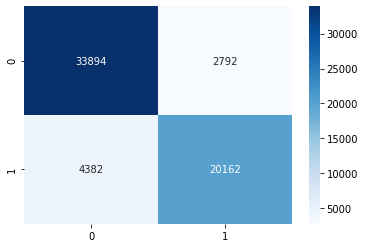

In [ ]:
cm_abc = confusion_matrix(test_y, y_pred_abc_cb)

df_abc = pd.DataFrame(cm_abc)

sns.heatmap(cm_abc, cmap='Blues',annot = True, fmt='')

**Giải thích cách tính** 

  Dữ liệu gồm 61,230 cả 2 nhãn *(1: Positive, 0: Nagative)*, trong đó có 36,686 nhãn 0 và 24,544 nhãn 1. Kết quả mô hình dự đoán:
  - Nhãn 1 gồm: *20,162 nhãn 1 (TP); 2,792 nhãn 0 (FN)*
  - Nhãn 0 gồm: *4,382 nhãn 1 (FP); 33,894 nhãn 0 (TN)*

- **Precision**

  - precision *(label 1)* = 20,162 / (20,162 + 2,792) = 0.87836 ~ 0.88

  - precision *(label 0)* = 33,894 / (33,894 + 4,382) = 0.88551 ~ 0.89

- **Recall**

  - recall *(label 1)* = 20,162 / (20,162 + 4,382) = 0.82146 ~ 0.82

  - recall *(label 0)* = 33,894 / (33,894 + 2,792) = 0.92389 ~ 0.92

- **F1-Score**

  - F1-Score *(label 1)* = 2 * 0.88 * 0.82 / (0.88 + 0.82) = 0.8489 ~ 0.85

  - F1-Score *(label 0)* = 2 * 0.88 * 0.92 / (0.88 + 0.92) = 0.89955 ~ 0.90

- **Macro Average**

  - Macro Average *(precision)* = 1/2 * (0.88 + 0.89) = 0.88

  - Macro Average *(recall)* = 1/2 * (0.82 + 0.92) = 0.87

  - Macro Average *(f1-score)* = 1/2 * (0.85 + 0.90) = 0.88

- **Weighted Average**

  - Weighted Average *(precision)* = (0.88 * 24,544 + 0.89 * 36,686) / 61,230 = 0.88599 

  - Weighted Average *(recall)* = (0.82 * 24,544 + 0.92 * 36,686) / 61,230 = 0.8799

  - Weighted Average *(f1-score)* = (0.85 * 24,544 + 0.90 * 36,686) / 61,230 = 0.8799


**1.2.** *Dự đoán với model được tạo train từ Word2Vec skip-gram*

In [ ]:
# use the model to predict the testing instances
y_pred_abc_sg = model_abc_sg.predict(test_x_sg)

# generate the classification report
print(classification_report(test_y_sg, y_pred_abc_sg))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     45232
           1       0.88      0.82      0.85     29964

    accuracy                           0.89     75196
   macro avg       0.88      0.88      0.88     75196
weighted avg       0.89      0.89      0.88     75196



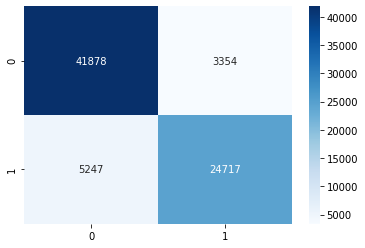

In [ ]:
cm_abc = confusion_matrix(test_y, y_pred_abc_sg)

df_abc = pd.DataFrame(cm_abc)

sns.heatmap(cm_abc, cmap='Blues',annot = True, fmt='')

###**2. SVM Classifier**

Vì dữ liệu rất mất cân bằng, nên sẽ gán trọng số cao hơn cho label đại diện thấp hơn. Cụ thể là **label 0** được gán trọng số cao hơn.

In [ ]:
class_weight = compute_class_weight(
    class_weight='balanced', classes=[0,1], y = train_y)

class_weight

array([0.83127712, 1.2546552 ])

####**2.1. Random Forest Classifier**

In [ ]:
# initialize the model and assign weights to each class
model_rfc = RandomForestClassifier(class_weight={0:class_weight[0], 1:class_weight[1]})

#train the model
model_rfc.fit(train_x, train_y)

**2.1.1**. *Dự đoán với model được tạo train từ Word2Vec CBOW*

In [ ]:
# use the model to predict the testing instances
y_pred_rfc_cb = model_rfc_cb.predict(np.array(test_x_cb))

# generate the classification report
print(classification_report(test_y_cb, y_pred_rfc_cb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     36686
           1       1.00      0.79      0.88     24544

    accuracy                           0.91     61230
   macro avg       0.94      0.89      0.91     61230
weighted avg       0.92      0.91      0.91     61230



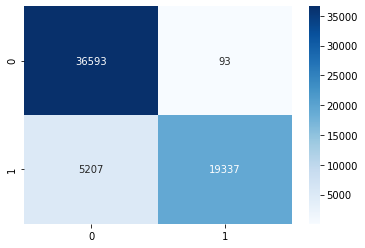

In [ ]:
cm_rfc = confusion_matrix(test_y, y_pred_rfc_cb)

df_rfc = pd.DataFrame(cm_rfc)

sns.heatmap(cm_rfc, cmap='Blues',annot = True, fmt='')

**2.1.2.** *Dự đoán với model được tạo train từ Word2Vec skip-gram*

In [ ]:
# use the model to predict the testing instances
y_pred_rfc_sg = model_rfc_sg.predict(np.array(test_x_sg))

# generate the classification report
print(classification_report(test_y_sg, y_pred_rfc_sg))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     45232
           1       0.99      0.83      0.90     29964

    accuracy                           0.93     75196
   macro avg       0.94      0.91      0.92     75196
weighted avg       0.93      0.93      0.93     75196



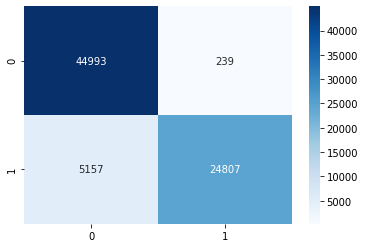

In [ ]:
cm_rfc = confusion_matrix(test_y, y_pred_rfc_sg)

df_rfc = pd.DataFrame(cm_rfc)

sns.heatmap(cm_rfc, cmap='Blues',annot = True, fmt='')

####**2.2. Logistic Regression**

In [ ]:
# initialize the model and assign weights to each class
model_lgr = LogisticRegression(class_weight={0:class_weight[0], 1:class_weight[1]})

#train the model
model_lgr.fit(train_x, train_y)


LogisticRegression(C=1.0,
                   class_weight={0: 0.831277119089075, 1: 1.2546551983047736},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

**2.2.1.** *Dự đoán với model được tạo train từ Word2Vec CBOW*

In [ ]:
# use the model to predict the testing instances
y_pred_lgr_cb = model_lgr_cb.predict(np.array(test_x_cb))

# generate the classification report
print(classification_report(test_y_cb, y_pred_lgr_cb))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     36686
           1       0.76      0.84      0.80     24544

    accuracy                           0.83     61230
   macro avg       0.82      0.83      0.83     61230
weighted avg       0.84      0.83      0.83     61230



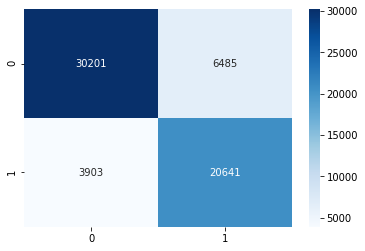

In [ ]:
cm_lgr = confusion_matrix(test_y, y_pred_lgr_cb)

df_lgr = pd.DataFrame(cm_lgr)

sns.heatmap(cm_lgr, cmap='Blues',annot = True, fmt='')

**2.2.2.** *Dự đoán với model được tạo train từ Word2Vec skip-gram*

In [ ]:
# use the model to predict the testing instances
y_pred_lgr_sg = model_lgr_sg.predict(np.array(test_x_sg))

# generate the classification report
print(classification_report(test_y_sg, y_pred_lgr_sg))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     45232
           1       0.75      0.83      0.79     29964

    accuracy                           0.82     75196
   macro avg       0.82      0.83      0.82     75196
weighted avg       0.83      0.82      0.83     75196



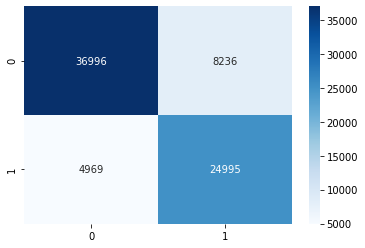

In [ ]:
cm_lgr = confusion_matrix(test_y, y_pred_lgr_sg)

df_lgr = pd.DataFrame(cm_lgr)

sns.heatmap(cm_lgr, cmap='Blues',annot = True, fmt='')

###**3. Save model**

- **Save model:**

In [ ]:
#lưu model classification với Word2Vec skip-gram trên drive

#AdaBoost Classifier
filename_abc = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/AdaBoostClassifier_model_sg.sav")
pickle.dump(model_abc, open(filename_abc, 'wb'))

#Random Forest Classifier
filename_rfc = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/RandomForestClassifier_model_sg.sav"
pickle.dump(model_rfc, open(filename_rfc, 'wb'))

#Logistic Regression
filename_lgr = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/LogisticRegressionClassifier_model_sg.sav"
pickle.dump(model_lgr, open(filename_lgr, 'wb'))

In [ ]:
#lưu model classification với Word2Vec CBOW trên drive

#AdaBoost Classifier
filename_abc = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/AdaBoostClassifier_model_cb.sav")
pickle.dump(model_abc, open(filename_abc, 'wb'))

#Random Forest Classifier
filename_rfc = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/RandomForestClassifier_model_cb.sav"
pickle.dump(model_rfc, open(filename_rfc, 'wb'))

#Logistic Regression
filename_lgr = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/LogisticRegressionClassifier_model_cb.sav"
pickle.dump(model_lgr, open(filename_lgr, 'wb'))

###**4. So sánh và nhận xét giữa các model**

Như so sánh về số lượng nhãn ở tập data_train mà nhóm đã thu thập ở trên,  có sự chênh lệch lớn giữa nhãn 0 *(tin chính thống)* chiếm phần lớn so với nhãn 1 *(tin châm biếm)*.

Vì thế, tụi em sử dụng *presicion-recall curve* để đánh giá và so sánh hiệu quả giữa các model đã thực hiện với nhau. 


**4.1.** *Model sử dụng Word2Vec skip-gram*

AdaBoost Classifier: f1=0.852 auc=0.939
Random Forest Classifier: f1=0.902 auc=0.968
Logistic Regression: f1=0.791 auc=0.830


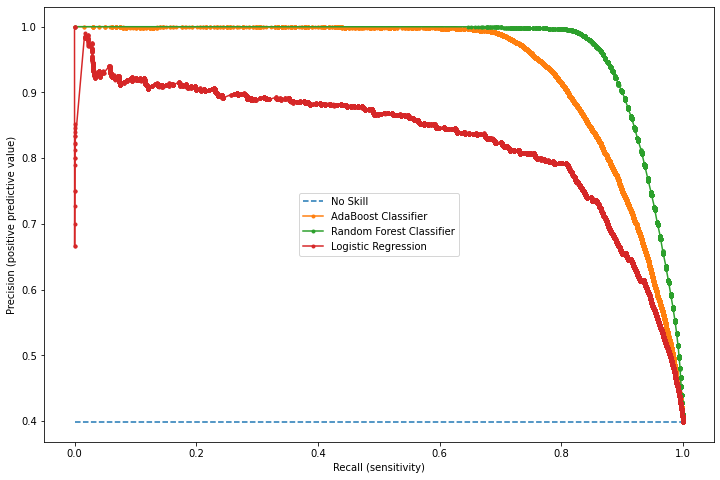

In [ ]:
# predict probabilities
y_pred_abc_sg = model_abc_sg.predict_proba(test_x_sg)
y_pred_rfc_sg = model_rfc_sg.predict_proba(test_x_sg)
y_pred_lgr_sg = model_lgr_sg.predict_proba(test_x_sg)


# keep probabilities for the positive outcome only
y_pred_abc_sg = y_pred_abc_sg[:, 1]
y_pred_rfc_sg = y_pred_rfc_sg[:, 1]
y_pred_lgr_sg = y_pred_lgr_sg[:, 1]


# predict class values
yhat = model_abc_sg.predict(test_x_sg)
abc_precision, abc_recall, _ = precision_recall_curve(test_y_sg, y_pred_abc_sg)
abc_f1, abc_auc = f1_score(test_y_sg, yhat), auc(abc_recall, abc_precision)

yhat = model_rfc_sg.predict(test_x_sg)
rfc_precision, rfc_recall, _ = precision_recall_curve(test_y_sg, y_pred_rfc_sg)
rfc_f1, rfc_auc = f1_score(test_y_sg, yhat), auc(rfc_recall, rfc_precision)

yhat = model_lgr_sg.predict(test_x_sg)
lgr_precision, lgr_recall, _ = precision_recall_curve(test_y_sg, y_pred_lgr_sg)
lgr_f1, lgr_auc = f1_score(test_y_sg, yhat), auc(lgr_recall, lgr_precision)

# summarize scores
print('AdaBoost Classifier: f1=%.3f auc=%.3f' % (abc_f1, abc_auc))
print('Random Forest Classifier: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lgr_f1, lgr_auc))


# plot the precision-recall curves
pyplot.subplots(figsize =(12, 8))
no_skill = len(test_y_sg[test_y_sg==1]) / len(test_y_sg)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(abc_recall, abc_precision, marker='.', label='AdaBoost Classifier')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
pyplot.plot(lgr_recall, lgr_precision, marker='.', label='Logistic Regression')


# axis labels
pyplot.xlabel('Recall (sensitivity)')
pyplot.ylabel('Precision (positive predictive value)')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**4.2.** *Model sử dụng Word2Vec CBOW*

AdaBoost Classifier: f1=0.849 auc=0.936
Random Forest Classifier: f1=0.879 auc=0.961
Logistic Regression: f1=0.799 auc=0.832


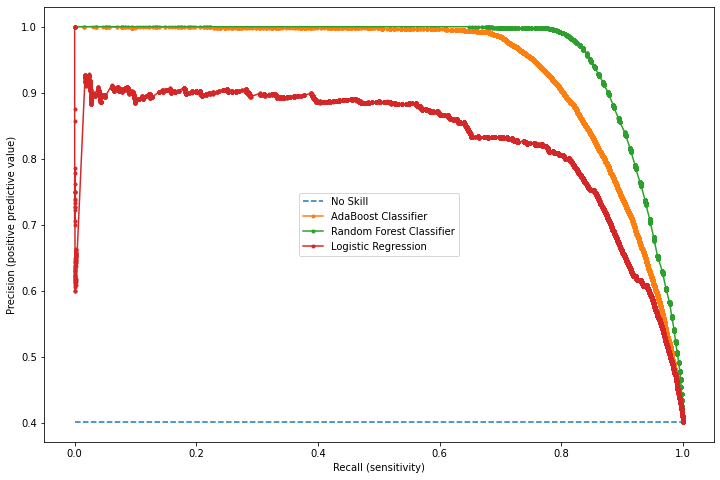

In [ ]:
# predict probabilities
y_pred_abc_cb = model_abc_cb.predict_proba(test_x_cb)
y_pred_rfc_cb = model_rfc_cb.predict_proba(test_x_cb)
y_pred_lgr_cb = model_lgr_cb.predict_proba(test_x_cb)


# keep probabilities for the positive outcome only
y_pred_abc_cb = y_pred_abc_cb[:, 1]
y_pred_rfc_cb = y_pred_rfc_cb[:, 1]
y_pred_lgr_cb = y_pred_lgr_cb[:, 1]


# predict class values
yhat = model_abc_cb.predict(test_x_cb)
abc_precision, abc_recall, _ = precision_recall_curve(test_y_cb, y_pred_abc_cb)
abc_f1, abc_auc = f1_score(test_y_cb, yhat), auc(abc_recall, abc_precision)

yhat = model_rfc_cb.predict(test_x_cb)
rfc_precision, rfc_recall, _ = precision_recall_curve(test_y_cb, y_pred_rfc_cb)
rfc_f1, rfc_auc = f1_score(test_y_cb, yhat), auc(rfc_recall, rfc_precision)

yhat = model_lgr_cb.predict(test_x_cb)
lgr_precision, lgr_recall, _ = precision_recall_curve(test_y_cb, y_pred_lgr_cb)
lgr_f1, lgr_auc = f1_score(test_y_cb, yhat), auc(lgr_recall, lgr_precision)

# summarize scores
print('AdaBoost Classifier: f1=%.3f auc=%.3f' % (abc_f1, abc_auc))
print('Random Forest Classifier: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lgr_f1, lgr_auc))


# plot the precision-recall curves
pyplot.subplots(figsize =(12, 8))
no_skill = len(test_y_cb[test_y_cb==1]) / len(test_y_cb)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(abc_recall, abc_precision, marker='.', label='AdaBoost Classifier')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
pyplot.plot(lgr_recall, lgr_precision, marker='.', label='Logistic Regression')


# axis labels
pyplot.xlabel('Recall (sensitivity)')
pyplot.ylabel('Precision (positive predictive value)')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

- Một đường cong precision-recall cho thấy mối quan hệ giữa precision (= giá trị dự đoán dương) và recall (= độ nhạy) đối với mọi điểm cắt có thể xảy ra. PRC là một đồ thị với: 

  - Trục x hiển thị recall (= độ nhạy = TP / (TP + FN)) 
  - Trục y hiển thị precision (= giá trị dự đoán dương = TP / (TP + FP))

- Đường cong precision-recall chỉ quan tâm đến dự đoán của nhãn thiểu số, cụ thể là nhãn 1.

- **No-skill classifier** *(đường gạch đứt màu xanh)* là một bộ phân loại không thể phân biệt giữa các lớp và sẽ dự đoán một lớp ngẫu nhiên hoặc một lớp không đổi trong mọi trường hợp. Dòng **no-skill* thay thay đổi dựa trên sự phân bố của các lớp *positive* đến *negative*. Nó là một đường ngang với giá trị của tỷ lệ các trường hợp *positive* trong tập dữ liệu. *(Đối với một tập dữ liệu cân bằng, đây là 0,5)*.

- Một đường cong precision-recall tốt là đường cong càng gần góc trên bên phải (hướng tới điểm (1;1)), ứng vô mô hình đó dự đoán càng tốt.

- Trên lý thuyết đó, ta thấy cả hai hướng sử dụng model Word2Vec là CBOW và Skip-gram thì model phân loại tướng tốt nhất đều là **Random Forest Classifier**. Tuy nhiên, đó là việc model thử nghiệm trên tập dev_set, còn trên bộ test_set độc lập hoàn toàn mới thì việc mô hình **Random Forest Classifier** dự đoán ra sao thì nhóm em sẽ thử nghiệm trên tập test độc lập dưới đây.

- Với **Random Forest Classifier** trên cả 2 mô hình Word2Vec thì mô hình phân loại nào sẽ đươc đánh giá tốt hơn. Tụi em có vẽ một biểu đồ để so sánh dưới đây.

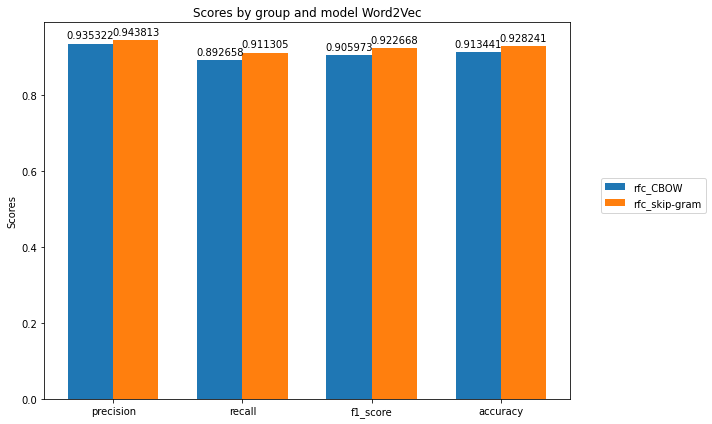

In [ ]:
labels = ['precision', 'recall', 'f1_score', 'accuracy']

# set width of ba

rfc_cb = []
rfc_sg = []

w2v = [test_y_cb, test_y_sg]
pred_rfc = [y_pred_rfc_cb, y_pred_rfc_sg]
for i in range(2):
  x1 = precision_score(w2v[i], pred_rfc[i], average='macro')
  x2 = recall_score(w2v[i], pred_rfc[i], average='macro')
  x3 = f1_score(w2v[i], pred_rfc[i], average='macro')
  x4 = accuracy_score(w2v[i], pred_rfc[i])
  if i == 0:
    rfc_cb.append(x1)
    rfc_cb.append(x2)
    rfc_cb.append(x3)
    rfc_cb.append(x4)
  else:
    rfc_sg.append(x1)
    rfc_sg.append(x2)
    rfc_sg.append(x3)
    rfc_sg.append(x4)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(10, 6))
rects1 = ax.bar(x - width/2, rfc_cb, width, label='rfc_CBOW')
rects2 = ax.bar(x + width/2, rfc_sg, width, label='rfc_skip-gram')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and model Word2Vec')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.05, 0.6))

#update matplotlib in order use
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

So sánh ở trên cho ta thấy với precision, recall, f1 và accuracy thì model **Random forest classifier skip-gram** đều nhỉnh hơn **CBOW**.

Nhìn tổng quát hơn, thì các mô hình phân loại sử dụng Word2Vec skip-gram đều cho kết quả dự đoán tốt hơn mô hình tương tự sử dụng CBOW

#**V. Kiểm tra model với test_set**

##**1. test_set**

Tập test_set được crawl từ 5 trang báo. Trong đó, chính thống 1 trang là:

  - The Mirror: https://www.mirror.co.uk/

và châm biếm 4 trang là:

  - The Dailyer: http://thedailyer.com/
  - The Onion: https://www.theonion.com/
  - The True North Times: http://www.truenorthtimes.ca/
  - The New Biscuit: http://www.newsbiscuit.com/

Sở dĩ có sự chênh lệch như vậy là do tin châm biếm ít, phải crawl từ nhiều trang.


Lấy link url file *Sarcasm_Detection_Test.csv*

In [ ]:
url_df_test = "/content/Sarcasm_Detection_upTest.csv"

#url_df_test = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/dataset/Sarcasm_Detection_upTest.csv"

file df_test *(Sarcasm_Detection_Test.csv)* có 42158 dòng.

In [ ]:
df_test = pd.read_csv(url_df_test, usecols=['is_sarcastic', 'title'])

print (df_test.shape)
df_test.head()

(42158, 2)


,is_sarcastic,title
0,0,Embarrassing dads surprise their children by t...
1,1,Man Takes Solace In Fact That World’s Oldest P...
2,1,Man Takes Solace In Fact That World’s Oldest P...
3,0,Elderly couple who locked up five children in ...
4,0,Mum whose tiny daughter is fed through a tube ...


Kiểm tra và biểu diễn dữ liệu từ *df_test*

0    26400
1    15758
Name: is_sarcastic, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


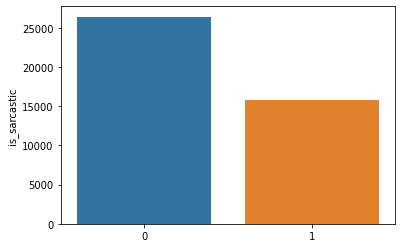

In [ ]:
z = df_test['is_sarcastic'].value_counts()
print(z)
sns.barplot(z.index,z)

Vẫn có sự chênh lệch tương đối lớn giữa 2 nhãn *label 0* gấp hơn **1.6** lần *label 1* (26400/1807 = 1.67).

Kiểm trả xem trong tập dữ liệu *df_train* và *df_test* có giá trị rỗng không. Nếu có thì xóa những hàng đó.

In [ ]:
print ("df_test:\n",df_test.isnull().sum())

df_test = df_test.dropna().reset_index(drop=True)

df_test:
 is_sarcastic    0
title           0
dtype: int64


- Xử lý file data_test. Và như nhóm đã đề cập và như file train_data thì tụi em cũng đã lưu lại file ***test_vectors*** ứng với 2 model Word2Vec sau khi xử lý xong.

In [ ]:
test_vectors = process_title(df_test) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##**2. Read test_vectors**

- *xử lý bởi model Word2Vec CBOW*

In [ ]:
test_vectors_cb = pd.read_csv("/content/test_vectors_cb.csv")

print (test_vectors_cb.shape)
test_vectors_cb.head()

(42094, 301)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,is_sarcastic
0,-0.325403,0.239614,-0.297187,0.160539,-0.090473,-0.025442,-0.049459,0.226378,0.306336,-0.065929,0.297472,-0.019530,0.148979,0.024822,-0.191805,0.122003,0.115924,0.127859,0.000638,-0.115195,0.133346,-0.189248,-0.033449,0.071049,-0.095812,0.027377,0.072827,-0.194604,0.314529,0.246390,-0.035375,-0.082526,0.007437,0.162848,0.199792,0.169471,0.158499,0.139550,-0.156721,-0.261887,...,0.141552,-0.111390,-0.017325,-0.138517,-0.220995,-0.403565,-0.100447,0.194844,-0.016498,0.287020,-0.135881,0.052328,-0.098251,0.038502,-0.082366,0.043516,0.001511,-0.129111,0.029665,0.078014,0.284370,-0.131432,-0.035719,0.159707,0.124598,0.019206,0.041793,-0.042067,-0.075826,0.227802,0.213607,0.149545,0.188272,-0.240113,0.059732,0.358840,0.016842,0.092082,-0.007073,0
1,-0.314016,-0.082805,-0.094286,-0.226285,-0.054396,-0.108194,-0.261575,-0.065578,-0.048672,-0.222607,0.379194,0.074785,0.228055,0.204274,-0.109971,0.210351,-0.250879,0.053076,-0.229213,0.134832,0.221186,-0.271272,0.174454,-0.097347,0.218293,0.098799,0.127219,-0.127123,0.321742,0.080654,-0.089783,0.325231,0.144329,-0.174021,0.304271,-0.030527,-0.052190,-0.062978,-0.101282,-0.148983,...,-0.213690,0.013431,0.153695,-0.095121,-0.113172,-0.142402,0.170110,-0.248363,-0.155854,0.140369,0.198446,0.016511,-0.103796,-0.338961,0.171668,0.103645,0.249403,-0.163884,0.081215,-0.186522,0.170485,0.200195,-0.070525,0.279595,0.350895,-0.068169,0.020315,-0.114449,0.015765,0.199776,0.024072,-0.271045,-0.067834,-0.131068,-0.096822,0.126037,0.128761,0.259669,-0.036611,1
2,-0.314016,-0.082805,-0.094286,-0.226285,-0.054396,-0.108194,-0.261575,-0.065578,-0.048672,-0.222607,0.379194,0.074785,0.228055,0.204274,-0.109971,0.210351,-0.250879,0.053076,-0.229213,0.134832,0.221186,-0.271272,0.174454,-0.097347,0.218293,0.098799,0.127219,-0.127123,0.321742,0.080654,-0.089783,0.325231,0.144329,-0.174021,0.304271,-0.030527,-0.052190,-0.062978,-0.101282,-0.148983,...,-0.213690,0.013431,0.153695,-0.095121,-0.113172,-0.142402,0.170110,-0.248363,-0.155854,0.140369,0.198446,0.016511,-0.103796,-0.338961,0.171668,0.103645,0.249403,-0.163884,0.081215,-0.186522,0.170485,0.200195,-0.070525,0.279595,0.350895,-0.068169,0.020315,-0.114449,0.015765,0.199776,0.024072,-0.271045,-0.067834,-0.131068,-0.096822,0.126037,0.128761,0.259669,-0.036611,1
3,-0.144914,0.163986,-0.103014,0.111232,-0.143847,0.026147,0.020622,0.092166,-0.068099,-0.100285,0.101783,0.320376,0.101065,-0.073042,0.031915,0.023744,-0.148409,-0.116256,-0.093086,0.031142,-0.157437,-0.224562,-0.071917,-0.036071,0.047591,-0.191248,-0.039803,0.033545,-0.205342,0.060869,-0.230917,0.047417,-0.204513,-0.157430,0.079427,0.016655,0.048005,-0.302967,-0.243293,0.045687,...,-0.094065,-0.233304,0.304303,-0.209513,0.004082,-0.094486,0.307185,0.101765,-0.332789,0.251622,-0.282582,-0.098741,0.067531,0.012815,0.108857,-0.080067,0.187886,0.172588,-0.122321,0.026763,0.053473,0.173099,-0.027897,0.095907,-0.010981,0.075079,0.055207,0.228248,-0.034509,0.141063,0.099454,0.039480,0.092540,-0.199174,-0.008145,0.384314,0.105503,0.167025,-0.172047,0
4,-0.231078,-0.056054,-0.264205,0.143474,-0.098694,-0.058938,-0.057771,0.164785,0.136064,-0.057395,0.307670,-0.021711,-0.139568,-0.111555,0.048043,0.140387,0.010232,-0.050091,-0.035300,0.017351,0.053468,-0.523442,-0.034659,-0.074883,-0.200336,-0.167380,0.120876,-0.224962,0.365662,-0.080014,-0.145133,-0.018811,-0.207450,0.066071,-0.024720,0.053798,0.080934,-0.016696,0.000452,-0.216046,...,0.125812,-0.180612,0.221568,0.158277,0.093161,-0.326395,-0.087101,-0.022632,-0.228636,0.127665,-0.061498,-0.388538,-0.199458,-0.080454,-0.048236,-0.100194,0.145863,-0.152133,0.043162,0.019922,0.277872,0.025439,-0.121737,0.171417,0.038193,0.131260,0.103656,-0.226476,0.027000,-0.031823,0.072223,0.1

- *xử lý bởi model Word2Vec skip-gram*

In [ ]:
test_vectors_sg = pd.read_csv("/content/test_vectors_sg.csv")

print (test_vectors_sg.shape)
test_vectors_sg.head()

(42094, 301)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,is_sarcastic
0,-0.251680,0.271856,-0.134861,0.477065,-0.175816,-0.215723,0.053331,0.158093,0.230221,-0.141310,0.318499,0.125520,0.103854,-0.050013,-0.390045,0.047075,0.230402,0.043042,0.272994,-0.072890,0.212952,-0.254671,-0.237613,0.381082,-0.313155,-0.039361,-0.040605,-0.235859,0.160884,0.286331,0.214303,0.192266,0.289003,0.215405,0.300727,0.037501,0.165554,0.035156,-0.004833,-0.149176,...,0.261219,-0.111066,-0.089276,0.014209,-0.278581,-0.181187,-0.177257,-0.165715,0.109524,0.343088,-0.181278,0.157070,-0.214566,0.113482,0.026452,0.144353,-0.223210,-0.190508,-0.101060,0.067401,0.084867,-0.134669,-0.018264,0.060391,0.123947,0.210519,-0.072350,-0.069697,-0.059692,0.232547,-0.002682,0.053273,0.136535,-0.429705,-0.026739,0.142951,0.028901,-0.086922,-0.096581,0
1,-0.269554,0.110733,0.040648,-0.119593,-0.039489,-0.166664,-0.293510,-0.307204,-0.075367,-0.105625,0.598539,0.046937,0.103767,0.092218,-0.052893,0.378657,-0.064584,-0.072932,-0.536509,-0.117450,0.466422,-0.414049,-0.035728,0.167546,-0.114442,0.237135,-0.091397,-0.174555,0.448365,-0.396086,-0.082671,0.527526,0.251353,-0.304750,0.042601,-0.076670,0.086352,0.066602,0.042234,-0.192463,...,0.005837,-0.046382,0.102524,-0.281636,-0.272072,-0.158346,0.315067,-0.386923,-0.193946,0.038715,0.376929,0.272823,-0.296991,-0.537720,0.185933,-0.037601,0.496996,-0.192113,0.224907,-0.146282,0.240572,0.181742,-0.103252,0.219974,0.363051,-0.128460,-0.022969,-0.083934,0.153559,0.391095,-0.052492,-0.298524,0.085937,-0.027399,-0.155266,-0.085409,0.162235,0.555444,-0.066707,1
2,-0.269554,0.110733,0.040648,-0.119593,-0.039489,-0.166664,-0.293510,-0.307204,-0.075367,-0.105625,0.598539,0.046937,0.103767,0.092218,-0.052893,0.378657,-0.064584,-0.072932,-0.536509,-0.117450,0.466422,-0.414049,-0.035728,0.167546,-0.114442,0.237135,-0.091397,-0.174555,0.448365,-0.396086,-0.082671,0.527526,0.251353,-0.304750,0.042601,-0.076670,0.086352,0.066602,0.042234,-0.192463,...,0.005837,-0.046382,0.102524,-0.281636,-0.272072,-0.158346,0.315067,-0.386923,-0.193946,0.038715,0.376929,0.272823,-0.296991,-0.537720,0.185933,-0.037601,0.496996,-0.192113,0.224907,-0.146282,0.240572,0.181742,-0.103252,0.219974,0.363051,-0.128460,-0.022969,-0.083934,0.153559,0.391095,-0.052492,-0.298524,0.085937,-0.027399,-0.155266,-0.085409,0.162235,0.555444,-0.066707,1
3,-0.070144,0.191926,-0.100465,0.168242,-0.154220,-0.011049,0.125689,0.045623,0.029871,-0.048811,0.109464,0.498968,0.007539,-0.308241,0.145376,0.056479,-0.098691,0.081243,-0.122709,0.029005,-0.215079,-0.301893,-0.083550,0.186420,0.061833,-0.213228,-0.008422,-0.055924,-0.308907,-0.245166,0.034756,0.163451,-0.200142,-0.201712,-0.084316,-0.007539,-0.116786,-0.066295,0.020901,0.019034,...,0.047573,-0.136164,0.319764,-0.273328,-0.155636,-0.142651,0.259084,0.071336,-0.453290,0.050016,-0.163350,-0.002541,0.085844,0.006051,0.021000,-0.257837,-0.013580,0.057760,-0.044435,0.198415,-0.104257,-0.057029,-0.124265,-0.156689,-0.140270,-0.032036,-0.002127,0.426032,-0.027098,0.155641,0.303790,0.044868,0.073666,-0.160203,0.138093,0.534848,-0.172448,0.263827,-0.217927,0
4,0.088623,0.007579,-0.203317,0.161680,0.063357,-0.266017,0.295252,0.124472,0.405546,0.120341,0.221447,0.006165,-0.175058,-0.143430,0.133590,0.178195,-0.086267,-0.102215,0.048838,0.039358,0.017422,-0.544915,0.076715,0.111942,-0.332329,-0.302672,0.003273,-0.181241,0.171942,-0.344653,-0.185487,-0.104501,-0.154089,-0.019720,-0.002498,0.096115,0.134686,-0.123499,0.180010,-0.180288,...,0.153851,-0.161414,0.193868,0.124657,-0.028355,-0.410197,0.087296,-0.217802,-0.319312,-0.095247,-0.110612,-0.209726,-0.235197,-0.192628,-0.146040,-0.142193,0.200052,-0.155387,0.177097,-0.122923,0.196504,-0.060480,-0.377964,-0.119265,-0.195308,0.233186,-0.046283,-0.056567,0.192022,-0.0648

**Lưu và file test_vector** 

Sử dụng lại để tiết kiệm thời gian xử lý lại.

- **Lưu test_vector:** Với 2 mô hình của word2vec 

In [ ]:
#lưu test_vector với Word2Vec skip-gram
url_drive = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/test_vector_sg.csv"
test_vector.to_csv(url_drive, header=True, index=False)

In [ ]:
#lưu test_vector với Word2Vec SBOW
url_drive = "/content/gdrive/MyDrive/Colab Notebooks/Machine Learning/31062021_sarcasm-detection/report/test_vector_cb.csv"
test_vector.to_csv(url_drive, header=True, index=False)

##**3. Chia tập X_test và y_test**

- *Theo test_vectors_sg xử lý từ Word2Vec skip-gram*

In [ ]:
X_test_sg = test_vectors_sg.drop('is_sarcastic', axis = 1)
y_test_sg = test_vectors_sg['is_sarcastic']

X_test_sg.shape, y_test_sg.shape

((42094, 300), (42094,))

- *Theo test_vectors_cb xử lý từ Word2Vec CBOW*

In [ ]:
X_test_cb = test_vectors_cb.drop('is_sarcastic', axis = 1)
y_test_cb = test_vectors_cb['is_sarcastic']

X_test_cb.shape, y_test_cb.shape

((42094, 300), (42094,))

##**4. Dự đoán**

###**4.1. Với Word2Vec skip-gram**

- *Random Forest Classifier model*

In [ ]:
# use the model to predict the testing instances
y_pred_sg_rfc = model_rfc_sg.predict(np.array(X_test_sg))

# generate the classification report
print(classification_report(y_test_sg, y_pred_sg_rfc))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75     26394
           1       0.35      0.06      0.10     15700

    accuracy                           0.61     42094
   macro avg       0.49      0.50      0.42     42094
weighted avg       0.52      0.61      0.51     42094



- *AdaBoost Classifier model*

In [ ]:
# use the model to predict the testing instances
y_pred_sg_abc = model_abc_sg.predict(np.array(X_test_sg))

# generate the classification report
print(classification_report(y_test_sg, y_pred_sg_abc))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64     26394
           1       0.40      0.42      0.41     15700

    accuracy                           0.55     42094
   macro avg       0.52      0.53      0.52     42094
weighted avg       0.56      0.55      0.55     42094



* *Logistic Regression*

In [ ]:
# use the model to predict the testing instances
y_pred_sg_lgr = model_lgr_sg.predict(np.array(X_test_sg))

# generate the classification report
print(classification_report(y_test_sg, y_pred_sg_lgr))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63     26394
           1       0.43      0.52      0.47     15700

    accuracy                           0.56     42094
   macro avg       0.55      0.55      0.55     42094
weighted avg       0.58      0.56      0.57     42094



**Biểu diễn các kết quả bằng confusion matrix**

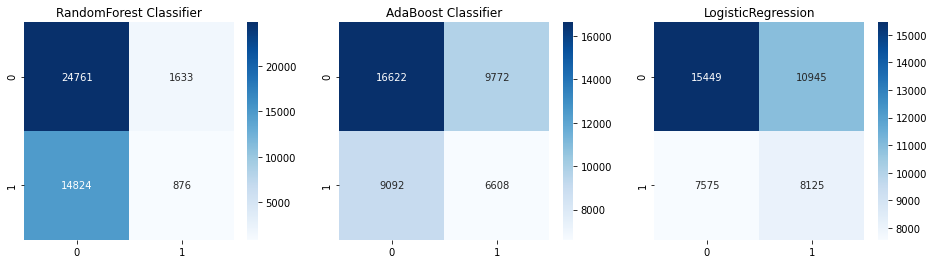

In [ ]:
figure, axis  = plt.subplots(1, 3, figsize=(16,4))

title = ["RandomForest Classifier","AdaBoost Classifier", "LogisticRegression"]
pred = [y_pred_sg_rfc, y_pred_sg_abc, y_pred_sg_lgr]
i = 0
while i < 3: 
  axis[i].title.set_text(title[i])
  cm_test = confusion_matrix(y_test_sg, pred[i])
  d_test = pd.DataFrame(cm_test)
  sns.heatmap(cm_test, cmap='Blues',annot = True, fmt='', ax=axis[i])
  i += 1

plt.show()

###**4.2. Với Word2Vec CBOW**

- *Random Forest Classifier model*

In [ ]:
# use the model to predict the testing instances
y_pred_cb_rfc = model_rfc_cb.predict(np.array(X_test_cb))

# generate the classification report
print(classification_report(y_test_cb, y_pred_cb_rfc))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77     26394
           1       0.42      0.01      0.01     15700

    accuracy                           0.63     42094
   macro avg       0.52      0.50      0.39     42094
weighted avg       0.55      0.63      0.49     42094



- *AdaBoost Classifier model*

In [ ]:
# use the model to predict the testing instances
y_pred_cb_abc = model_abc_cb.predict(np.array(X_test_cb))

# generate the classification report
print(classification_report(y_test_cb, y_pred_cb_abc))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61     26394
           1       0.29      0.26      0.27     15700

    accuracy                           0.49     42094
   macro avg       0.44      0.44      0.44     42094
weighted avg       0.48      0.49      0.48     42094



* *Logistic Regression*

In [ ]:
# use the model to predict the testing instances
y_pred_cb_lgr = model_lgr_cb.predict(np.array(X_test_cb))

# generate the classification report
print(classification_report(y_test_cb, y_pred_cb_lgr))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     26394
           1       0.36      0.39      0.37     15700

    accuracy                           0.52     42094
   macro avg       0.49      0.49      0.49     42094
weighted avg       0.52      0.52      0.52     42094



**Biểu diễn các kết quả bằng confusion matrix**

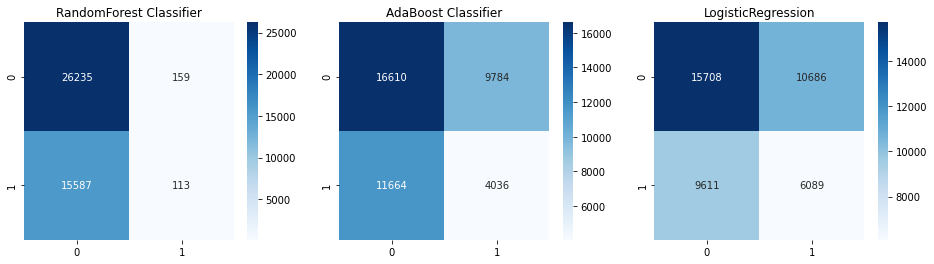

In [ ]:
figure, axis  = plt.subplots(1, 3, figsize=(16,4))

title = ["RandomForest Classifier","AdaBoost Classifier", "LogisticRegression"]
pred = [y_pred_cb_rfc, y_pred_cb_abc, y_pred_cb_lgr]
i = 0
while i < 3: 
  axis[i].title.set_text(title[i])
  cm_test = confusion_matrix(y_test_cb, pred[i])
  d_test = pd.DataFrame(cm_test)
  sns.heatmap(cm_test, cmap='Blues',annot = True, fmt='', ax=axis[i])
  i += 1

plt.show()

###**4.3. So sánh**

- ***CBOW***

AdaBoost Classifier: f1=0.273 auc=0.320
Random Forest Classifier: f1=0.014 auc=0.358
Logistic Regression: f1=0.375 auc=0.452


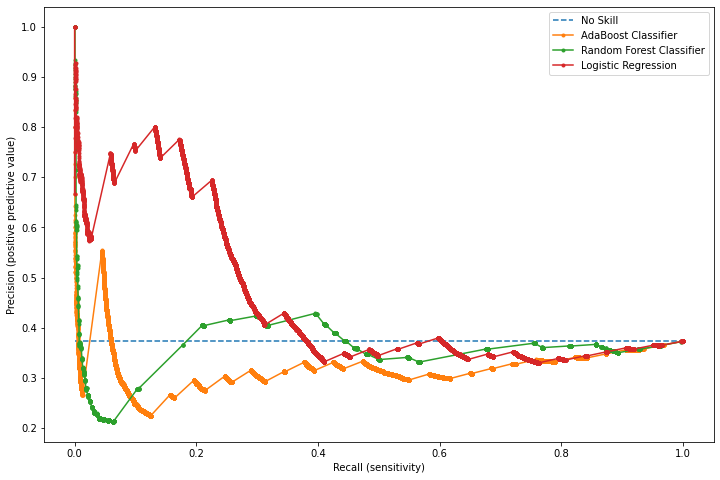

In [ ]:
# predict probabilities
y_pred_abc_cb = model_abc_cb.predict_proba(X_test_cb)
y_pred_rfc_cb = model_rfc_cb.predict_proba(X_test_cb)
y_pred_lgr_cb = model_lgr_cb.predict_proba(X_test_cb)


# keep probabilities for the positive outcome only
y_pred_abc_cb = y_pred_abc_cb[:, 1]
y_pred_rfc_cb = y_pred_rfc_cb[:, 1]
y_pred_lgr_cb = y_pred_lgr_cb[:, 1]


# predict class values
yhat = model_abc_cb.predict(X_test_cb)
abc_precision, abc_recall, _ = precision_recall_curve(y_test_cb, y_pred_abc_cb)
abc_f1, abc_auc = f1_score(y_test_cb, yhat), auc(abc_recall, abc_precision)

yhat = model_rfc_cb.predict(X_test_cb)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test_cb, y_pred_rfc_cb)
rfc_f1, rfc_auc = f1_score(y_test_cb, yhat), auc(rfc_recall, rfc_precision)

yhat = model_lgr_cb.predict(X_test_cb)
lgr_precision, lgr_recall, _ = precision_recall_curve(y_test_cb, y_pred_lgr_cb)
lgr_f1, lgr_auc = f1_score(y_test_cb, yhat), auc(lgr_recall, lgr_precision)

# summarize scores
print('AdaBoost Classifier: f1=%.3f auc=%.3f' % (abc_f1, abc_auc))
print('Random Forest Classifier: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lgr_f1, lgr_auc))


# plot the precision-recall curves
pyplot.subplots(figsize =(12, 8))
no_skill = len(y_test_cb[y_test_cb==1]) / len(y_test_cb)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(abc_recall, abc_precision, marker='.', label='AdaBoost Classifier')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
pyplot.plot(lgr_recall, lgr_precision, marker='.', label='Logistic Regression')


# axis labels
pyplot.xlabel('Recall (sensitivity)')
pyplot.ylabel('Precision (positive predictive value)')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

- ***Skip-gram***

AdaBoost Classifier: f1=0.412 auc=0.397
Random Forest Classifier: f1=0.096 auc=0.355
Logistic Regression: f1=0.467 auc=0.460


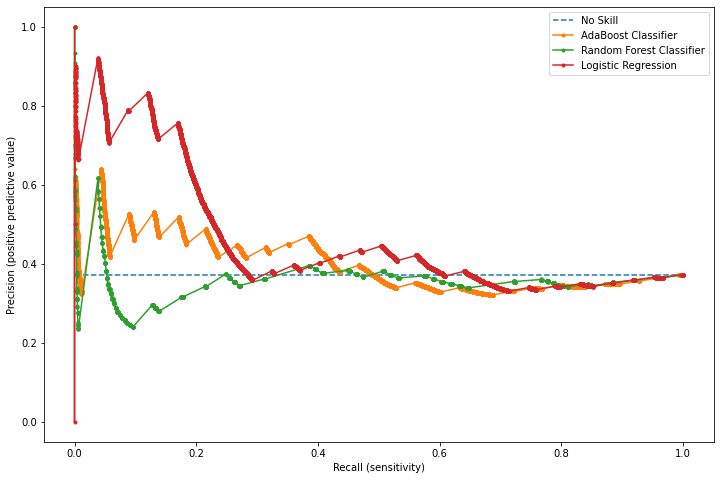

In [ ]:
# predict probabilities
y_pred_abc_sg = model_abc_sg.predict_proba(X_test_sg)
y_pred_rfc_sg = model_rfc_sg.predict_proba(X_test_sg)
y_pred_lgr_sg = model_lgr_sg.predict_proba(X_test_sg)


# keep probabilities for the positive outcome only
y_pred_abc_sg = y_pred_abc_sg[:, 1]
y_pred_rfc_sg = y_pred_rfc_sg[:, 1]
y_pred_lgr_sg = y_pred_lgr_sg[:, 1]


# predict class values
yhat = model_abc_sg.predict(X_test_sg)
abc_precision, abc_recall, _ = precision_recall_curve(y_test_sg, y_pred_abc_sg)
abc_f1, abc_auc = f1_score(y_test_sg, yhat), auc(abc_recall, abc_precision)

yhat = model_rfc_sg.predict(X_test_sg)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test_sg, y_pred_rfc_sg)
rfc_f1, rfc_auc = f1_score(y_test_sg, yhat), auc(rfc_recall, rfc_precision)

yhat = model_lgr_sg.predict(X_test_sg)
lgr_precision, lgr_recall, _ = precision_recall_curve(y_test_sg, y_pred_lgr_sg)
lgr_f1, lgr_auc = f1_score(y_test_sg, yhat), auc(lgr_recall, lgr_precision)

# summarize scores
print('AdaBoost Classifier: f1=%.3f auc=%.3f' % (abc_f1, abc_auc))
print('Random Forest Classifier: f1=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lgr_f1, lgr_auc))


# plot the precision-recall curves
pyplot.subplots(figsize =(12, 8))
no_skill = len(y_test_sg[y_test_sg==1]) / len(y_test_sg)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(abc_recall, abc_precision, marker='.', label='AdaBoost Classifier')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest Classifier')
pyplot.plot(lgr_recall, lgr_precision, marker='.', label='Logistic Regression')


# axis labels
pyplot.xlabel('Recall (sensitivity)')
pyplot.ylabel('Precision (positive predictive value)')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#**VI. Nhận xét**

###**Nhận xét với mô hình phân loại**
- Ứng với các mô hình phân loại tin châm biến được xử lý dữ liệu với *CBOW* và *skip-gram* thì các mô hình phân loại sử dụng skip-gram cho kết quả tốt hơn ở **dev_set** *(như có so sánh ở trên)*.
- Nhóm sử dụng 3 mô hình phân loại là AdaBoost Classifier, Random Forest Classifier và Logistic Regression để train và dự đoán kết quả, thì mô hình AdaBoost Classifier có thời gian train lâu nhất, tiếp đên là Random Forest Classifier và cuối cùng là Logistic Regression.

- Việc đánh giá mô hình phải dựa vào nhiều độ đo, như trong bài thì nhóm em sử dụng Precision, recall, f1_score và accuracy là chủ yếu. Trong đó Precision, recall và f1_score là những phép đo quan trọng cần lưu ý. Một yêu cầu có thể dẫn đến mô hình dự đoán tốt là f1_score phải cao, bởi f1_score có thể coi là sự hài hòa giữa precision và recall. Ngoài ra, việc tính precision, recall cho mỗi nhãn cũng cần phải cao (hoặc tương đồng nhau), nếu một trong 2 nhãn có điểm cao, nhãn còn lại rất thấp thì không phản ánh được model phân loại tốt, thậm chí đó là tệ.
  - Ví dụ cho điều này ta lấy kết quả dự đoán mô hình Random Forest Classifier CBOW trên test_set với:
    - Recall (nhãn 0) là: 0.99
    - Recall (nhãn 1) là: 0.01.
  điều này dẫn đến phần lớn các tin châm biếm được dự đoán là tin chính thống, điều này nguy hiểm cho người đọc hơn là việc dự đoán tin chính thống là tin châm biếm.

- Khi mô hình dự đoán trên **dev_set** thì cho kết quả việc dự đoán các nhãn khá tương đồng nhau. Nhưng ngược lại với **dev_set** thì trên **test_set** độc lập thì mô hình có xu hướng dự đoán các tin thuộc nhãn 0 *(tin chính thống)* chiếm phần lớn.
  - Ví dụ với model *Random Forest Classifier skip-gram* khi dự đoán trên test_set thì giá trị **recall *(nhãn 1)* = 0.06** nghĩa là *tỷ lệ dự đoán đúng nhãn 1 (tin châm biếm) trên tất cả nhãn 1 chỉ là 0.06* hay có thể hình dung trong 100 nhãn 1 mô hình chỉ có đúng 6 dự đoán chính xác nhãn 1, còn lại 94 nhãn 1 được mô hình dự đoán nhãn 0.

- Trái ngược với khi dự đoán mô hình với dev_set thì việc dự đoán trên tập test_set độc lập dẫn ra kết quả không tốt và kết luận trái ngược với dự đoán với dev_set. Cụ thể:

  - Khi mô hình dự đoán với dev_set thì mô hình phân loại ***Random Forest Classifer*** cho kết quả dự đoán tốt nhất trên cả hai mô hình Word2Vec là CBOW và Skip-gram *(skip-gram tốt hơn CBOW)* và ***Logistic Regression*** là mô hình tệ nhất trong cả 3 mô hình phân loại. Tuy nhiên, khi chạy thử nghiệm trên tập test_set độc lập, ta thấy mô hình phân loại ***Logistic Regression*** lại cho kết quả dự đoán khả quan nhất *(khả quan nhưng không phải tốt)* còn ***Random Forest Classifier** lại là mô hình tệ nhất. 
  
  - Chọn các mô hình phân loại được xây dừng Word2Vec skip-gram để lấy ví dụ về kết quả dự đoán *(các kết quả phân loại từ skip-gram tốt hơn CBOW theo như dự đoán)* thì ta có: 

    - Ta có kết quả của **F1_score_RandomForest_Classifer = 0.096**, con số tệ nhất trong 3 mô hình phân loại mà nhóm đã thực hiện dự đoán trên ***test_set***. Kết quả này trái ngược hoàn toàn với **F1_score_RandomForest_Classifer = 0.902** kết quả tốt nhất trong các mô hình phân loại khi dự đoán với ***dev_set***. Trong khi đó mô hình phân loại được đánh giá tệ nhất khi chạy trên ***dev_set*** là *Logistic Regression* (F1_score = 0.791) lại cho kết quả tốt nhất với ***test_set*** (F1_score = 0.467).

- Mô hình **AdaBoost Classifier** trong 2 lần thử nghiệm với dev_set và test_set cho kết quả ổn đinh, luôn ở giữa *random forest classifier* và *logistic regression*, kết quả tương đối tốt khi thử nghiệm với dev_test *(F1_score = 0.88)* và không phải tệ nhất ở thử nghiệm test_set độc lập *(F1_score = 0.412)*

###**Đánh giá**

1. Các mô hình phân loại mà nhóm đã sử dụng đều cho kết quả tốt ở nhãn 0 và tệ ở nhãn 1. Nhìn chung khi thử nghiệm test_set các mô hình cho kết quả không tốt.

2. Việc đào tạo mô hình phân loại tin châm biếm bằng việc sử dụng Word2Vec skip-gram có kết quả tốt hơn sử dụng Word2Vec CBOW.

3. Do tập dataset có sự chênh lệch giữa nhãn 0 *(tin chính thóng)* và nhãn 1 *(tin chấm biếm)* *(nhãn 0 gấp 1.5 lần nhãn 1)*. Nên có thể dẫn đến việc mô hình có xu hướng phân loại các tin *(cả chính thống và châm biếm)* thành tin chính thống.

4. Việc dự đoán tin châm biếm thành tin chính thống nguy hiểm hơn việc dự đoán tin chính thống thành tin châm biếm

5. Nhóm đề xuất mô hình AdaBoost Classifier cho mô hình dự đoán tin châm biếm, bởi tính ổn định của mô hình theo như kết quả train và test của nhóm. Bên cạnh đó là thời gian train chấp nhận được (tầm 5 tiếng theo nhóm em train được).

6. Việc đánh giá mô hình phân loại có 3 giá trị quan trọng precision, recall và f1_score. F1_score cao -> mô hình tốt. Ngoài ra cần coi precision và recall của mỗi nhãn.

